## __AUTOINLAND INSURANCE CLAIM CHALLENGE__


### __FEATURE ENGINEERING AND EXTRACTION__

In [2]:
import pandas as pd
import numpy as np
import sklearn
import imblearn

#### **FETCHING DATA**

In [3]:
data = pd.read_csv('Train.csv')

In [4]:
data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


In [6]:

data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


#### **HANDLING MISSING VALUES**

In [7]:
data['Gender'].fillna(method = 'ffill', inplace = True)
data['Car_Category'].fillna(method = 'bfill', inplace = True)
data['Subject_Car_Colour'].fillna(method = 'ffill', inplace = True)
data['Subject_Car_Make'].fillna(method = 'bfill', inplace = True)
data['LGA_Name'].fillna(method = 'bfill', inplace = True)
data['State'].fillna(method = 'bfill', inplace = True)
data['LGA_Name'].fillna(method = 'bfill', inplace = True)

In [8]:
data.isna().sum()

ID                        0
Policy Start Date         0
Policy End Date           0
Gender                    0
Age                       0
First Transaction Date    0
No_Pol                    0
Car_Category              0
Subject_Car_Colour        0
Subject_Car_Make          0
LGA_Name                  0
State                     0
ProductName               0
target                    0
dtype: int64

In [9]:
data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,Lagos,Lagos,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,Lagos,Lagos,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,Lagos,Lagos,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,Saloon,Red,TOYOTA,Lagos,Lagos,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,Saloon,Red,TOYOTA,Lagos,Lagos,Muuve,1


#### **FEATURE EXTRACTION**

In [10]:
#Convert to datetime to extract more info
data['Policy Start Date'] = pd.to_datetime(data['Policy Start Date'])
data['Policy End Date'] = pd.to_datetime(data['Policy End Date'])
data['First Transaction Date'] = pd.to_datetime(data['First Transaction Date'])


#Age binning
bin_ranges = [0, 15, 30, 45, 60, 75, 100,150]
bin_names = [1, 2, 3, 4, 5, 6,7]
data['Age_bin'] = (pd.cut(np.array(np.abs(data['Age'])), bins=bin_ranges, labels=bin_names)).map(str)
data['Age_bin'].fillna(method = 'bfill', inplace = True)
data['Age_bin'] = data['Age_bin'].map(str)

#Days Covered by Policy
data['No_Days_Policy'] = ((data['Policy End Date'] - data['Policy Start Date']).dt.days).map(str)

#map the column to string
data['No_Pol'] = data['No_Pol'].map(int)



data.head()
#data.isna().sum()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Age_bin,No_Days_Policy
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,Lagos,Lagos,Car Classic,0,2,364
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,Lagos,Lagos,Car Classic,1,6,364
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,Lagos,Lagos,Car Classic,0,3,364
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,Saloon,Red,TOYOTA,Lagos,Lagos,CarSafe,0,1,364
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,Saloon,Red,TOYOTA,Lagos,Lagos,Muuve,1,2,124


In [11]:
state_dict = dict(data['State'].value_counts())
k_less = list()
for key,val in state_dict.items():
    if val < 100:
        k_less.append(key)

for i in range(len(data)):

    if data.loc[i, 'State'] in k_less:
        data.loc[i, 'State_ext'] = 'Other'
    else:
        data.loc[i, 'State_ext'] = data.loc[i, 'State']





In [12]:
col = dict(data['Subject_Car_Colour'].value_counts())
k = list()
for key,val in col.items():
    if val < 100:
        k.append(key)

for i in range(len(data)):

    if data.loc[i, 'Subject_Car_Colour'] in k:
        data.loc[i, 'Car_Colour_ext'] = 'Other'
    else:
        data.loc[i, 'Car_Colour_ext'] = data.loc[i, 'Subject_Car_Colour']


In [13]:
make = dict(data['Subject_Car_Make'].value_counts())
k = list()
for key,val in make.items():
    if val < 100:
        k.append(key)

for i in range(len(data)):

    if data.loc[i, 'Subject_Car_Make'] in k:
        data.loc[i, 'Car_Make_ext'] = 'Other'
    else:
        data.loc[i, 'Car_Make_ext'] = data.loc[i, 'Subject_Car_Make']


In [14]:
gen = dict(data['Gender'].value_counts())
k = list()
for key,val in gen.items():
    if val < 1000:
        k.append(key)

for i in range(len(data)):

    if data.loc[i, 'Gender'] in k:
        data.loc[i, 'Gender_ext'] = 'Other'
    else:
        data.loc[i, 'Gender_ext'] = data.loc[i, 'Gender']


In [15]:
data.tail()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Age_bin,No_Days_Policy,State_ext,Car_Colour_ext,Car_Make_ext,Gender_ext
12074,ID_ZZA1SES,2010-05-25,2011-05-24,Female,30,2010-05-25,1,JEEP,Black,Range Rover,Ibeju/Lekki,Ibeju-Lekki,Car Classic,1,2,364,Ibeju-Lekki,Black,Range Rover,Female
12075,ID_ZZDAC3K,2010-10-03,2011-10-02,Female,59,2010-10-03,1,JEEP,Black,TOYOTA,Victoria Island,Lagos,Car Classic,0,4,364,Lagos,Black,TOYOTA,Female
12076,ID_ZZIU2XC,2010-10-10,2011-10-08,Male,34,2010-10-10,1,JEEP,Black,TOYOTA,Victoria Island,Lagos,CarSafe,0,3,363,Lagos,Black,TOYOTA,Male
12077,ID_ZZRQ1NF,2010-02-27,2011-02-26,Male,120,2010-02-27,2,JEEP,White,TOYOTA,Victoria Island,Lagos,CVTP,0,7,364,Lagos,White,TOYOTA,Male
12078,ID_ZZWRIIE,2010-07-01,2011-06-30,Female,46,2010-07-01,2,JEEP,Black,Land Rover,Lagos Island,Lagos,Car Classic,0,4,364,Lagos,Black,Other,Female


In [16]:
"""
Dropping some unique columns
-target that will be used for prediction
-Age,ID
-First Transaction Date: It is the same as the Policy Start Date
-LGA_Name since it is contained in State

"""
target = data['target']
features = data.drop(['target', 'Age', 'ID', 'First Transaction Date','Policy Start Date','Subject_Car_Make','Gender','Subject_Car_Colour', 'Policy End Date', 'LGA_Name','State'], axis = 1)
features.head(20)



,No_Pol,Car_Category,ProductName,Age_bin,No_Days_Policy,State_ext,Car_Colour_ext,Car_Make_ext,Gender_ext
0,1,Saloon,Car Classic,2,364,Lagos,Black,TOYOTA,Male
1,1,JEEP,Car Classic,6,364,Lagos,Grey,TOYOTA,Female
2,1,Saloon,Car Classic,3,364,Lagos,Red,TOYOTA,Male
3,1,Saloon,CarSafe,1,364,Lagos,Red,TOYOTA,Male
4,3,Saloon,Muuve,2,124,Lagos,Red,TOYOTA,Other
5,2,Saloon,Car Classic,3,364,Lagos,Red,TOYOTA,Male
6,3,Saloon,CVTP,3,364,Lagos,Red,TOYOTA,Female
7,1,Saloon,CarSafe,3,364,Benue,Red,TOYOTA,Male
8,2,JEEP,Car Classic,5,364,Benue,Black,Other,Female
9,1,JEEP,Car Classic,4,364,Eti-Osa,Black,Lexus,Female


In [17]:
# Converting categorical features to numerical features
cat = ['Gender_ext', 'Car_Category', 'Car_Colour_ext','Age_bin','No_Pol','Car_Make_ext','State_ext', 'ProductName']

# One Hot Encoding conversion
feature = pd.get_dummies(features, prefix_sep= "_", columns = cat)

feature.shape

(12079, 85)

#### __FEATURE SCALING__

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range= (0,1))
feature['No_Days_Policy'] = scaler.fit_transform(feature['No_Days_Policy'].values.reshape(-1,1))

#### **FEATURE SELECTION**

##### **USING VARIANCE THRESHOLD**


In [19]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=.015)
vt.fit(feature,target)


VarianceThreshold(threshold=0.015)

In [20]:
#Printing to view variance of each feature and whether they are selected or not

best_features = pd.DataFrame({'variance': vt.variances_,'select_feature': vt.get_support()},index=feature.columns).T
best_features

,No_Days_Policy,Gender_ext_Female,Gender_ext_Male,Gender_ext_Other,Car_Category_Bus,Car_Category_CAMRY CAR HIRE,Car_Category_JEEP,Car_Category_Mini Bus,Car_Category_Mini Van,Car_Category_Motorcycle,...,State_ext_Rivers,ProductName_CVTP,ProductName_Car Classic,ProductName_Car Plus,ProductName_Car Vintage,ProductName_CarFlex,ProductName_CarSafe,ProductName_Customized Motor,ProductName_Motor Cycle,ProductName_Muuve
variance,0.000372,0.203614,0.227781,0.061916,0.006743,0.000166,0.18496,0.004615,0.00124,0.001818,...,0.009917,0.03732,0.24864,0.038616,0.000414,0.014358,0.214822,0.043084,0.003794,0.00764
select_feature,False,True,True,True,False,False,True,False,False,False,...,False,True,True,True,False,False,True,True,False,False


In [21]:
#creating a subset from the total of 578 columns

feature_sub = feature.iloc[:,vt.get_support()]
feature_sub

,Gender_ext_Female,Gender_ext_Male,Gender_ext_Other,Car_Category_JEEP,Car_Category_Saloon,Car_Colour_ext_As Attached,Car_Colour_ext_Ash,Car_Colour_ext_Black,Car_Colour_ext_Blue,Car_Colour_ext_Gold,...,State_ext_Lagos,State_ext_Obia-Akpor,State_ext_Ogun,State_ext_Oshodi-Isolo,State_ext_Other,ProductName_CVTP,ProductName_Car Classic,ProductName_Car Plus,ProductName_CarSafe,ProductName_Customized Motor
0,0,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
12075,1,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
12076,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
12077,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


#### **MODELLING**

##### __SPLITTING WITH OVER SAMPLING__

In [22]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
rs = RandomOverSampler()
f_sub,t_sub = rs.fit_resample(feature_sub,target)
fr_train,fr_test,tr_train,tr_test = train_test_split(f_sub,t_sub,stratify=t_sub, test_size=.2,random_state=0)


##### __RANDOM FOREST CLASSIFIER__

In [23]:
from sklearn.ensemble import RandomForestClassifier
r = RandomForestClassifier()
r.fit(fr_train,tr_train)

RandomForestClassifier()

In [24]:
tr_pred = r.predict(fr_test)

In [25]:
from sklearn.metrics import accuracy_score, f1_score

f1 = f1_score(tr_test,tr_pred)
acc = accuracy_score(tr_test,tr_pred)

print(f'F1_Score: {f1}')
print(f'Accuracy_Score: {acc}')

F1_Score: 0.8810799228626526
Accuracy_Score: 0.8694117647058823


/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


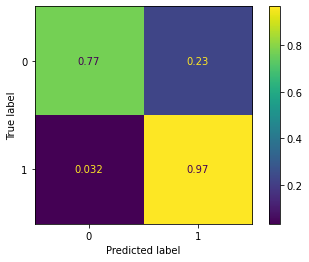

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(r,fr_test,tr_test,normalize='true')
plt.show()

##### __XGBOOST__

The XGBoost algorithm, short for Extreme Gradient Boosting:
 - Is simply an improvised version of the gradient boosting algorithm.
 - The crucial point in XGBoost is that it implements parallel processing at the node level, making it more powerful and fast than the gradient boosting algorithm.
 - XGBoost reduces overfitting and improves overall performance by including various regularization techniques by setting the hyperparameters of the XGBoost algorithm.


One important point to note about XGBoost is that:
 - You don’t need to worry about the missing values in the dataset because, during the training process, the model itself learns where to fit the missing values.

XGBoost is can be  used for both classification and regression problems.

In [27]:
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=500)

xgb.fit(fr_train,tr_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [28]:
xgb_tr_pred = xgb.predict(fr_test)

In [29]:
xgb_acc = accuracy_score(tr_test,xgb_tr_pred)
xgb_f1 = f1_score(tr_test,xgb_tr_pred)
print(f'F1 score: {xgb_f1}')
print(f'Accuracy_score: {xgb_acc}')

F1 score: 0.8626373626373626
Accuracy_score: 0.8470588235294118


/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


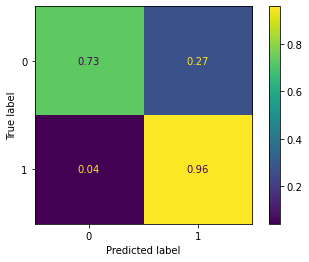

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb,fr_test,tr_test,normalize='true')
plt.show()

##### __LIGHTGBM__

Light GBM:
 - is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

Since it is based on decision tree algorithms, 
 - It splits the tree leaf wise with the best fit.
 - So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm.
 - Hence results in much better accuracy rarely achieved by any of the existing boosting algorithms. Also, it is surprisingly very fast, hence the word ‘Light’.


In [31]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(fr_train,tr_train)

LGBMClassifier()

In [32]:
lgbm_tr_pred = lgbm.predict(fr_test)

In [33]:
xgb_acc = accuracy_score(tr_test,lgbm_tr_pred)
xgb_f1 = f1_score(tr_test,lgbm_tr_pred)
print(f'F1 score: {xgb_f1}')
print(f'Accuracy_score: {xgb_acc}')

F1 score: 0.7954964176049129
Accuracy_score: 0.7649411764705882


/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


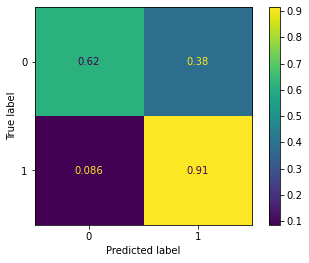

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lgbm,fr_test,tr_test,normalize='true')
plt.show()

##### __VOTINGCLASSIFIER__

A voting classifier
 - is a machine learning estimator that trains various base models or estimators and predicts on the basis of aggregating the findings of each base estimator.
 - The aggregating criteria can be combined decision of voting for each estimator output. 


The voting criteria can be of two types:
 - Hard Voting: Voting is calculated on the predicted output class.
 - Soft Voting: Voting is calculated on the predicted probability of the output class.

Comes with a limitation:
 - The model interpretability decreases, as one cannot interpret the model using shap, or lime packages.

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

es_1 = LogisticRegression(random_state = 0)
es_2 = GaussianNB()
es_3 = RandomForestClassifier(n_estimators=200,random_state=0)

vc = VotingClassifier(estimators = [('lr', es_1), ('gnb', es_2), ('rfc', es_3)], voting= 'hard')
vc.fit(fr_train,tr_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=0)),
                             ('gnb', GaussianNB()),
                             ('rfc',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=0))])

In [37]:
vc_tr_pred = vc.predict(fr_test)

In [38]:
vc_acc = accuracy_score(tr_test,vc_tr_pred)
vc_f1 = f1_score(tr_test,vc_tr_pred)
print(f'F1 score: {vc_f1}')
print(f'Accuracy_score: {vc_acc}')

F1 score: 0.7736389684813754
Accuracy_score: 0.739764705882353


/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


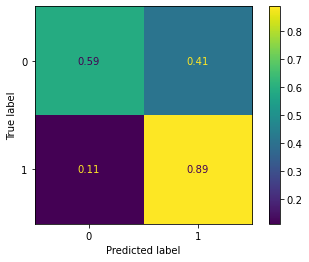

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(vc,fr_test,tr_test,normalize='true')
plt.show()

##### __CATBOOST__

CatBoost:
 - is an open-source machine learning(gradient boosting) algorithm.
 - Its name is coined from “Category” and “Boosting",developed to be applied to a wide range of areas such as recommendation systems, search ranking, self-driving cars, forecasting, and virtual assistants. 


Useful features:
 - Dictate if overfitting occurs. CatBoost implements overfitting detection.
 - Missing value support: CatBoost provides three inherent missing values strategies for processing missing values.
 - Cross-validation: CatBoost allows to perform cross-validation on the given dataset. In cross-validation mode, the training data is split into folds of learning and evaluation.



In [47]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier(verbose=0, n_estimators=100,depth= 10,learning_rate= 0.5,l2_leaf_reg= 5,)
cbc.fit(fr_train, tr_train)

In [48]:
cbc_tr_pred = cbc.predict(fr_test)

In [49]:
cbc_acc = accuracy_score(tr_test,cbc_tr_pred)
cbc_f1 = f1_score(tr_test,cbc_tr_pred)
print(f'F1 score: {cbc_f1}')
print(f'Accuracy_score: {cbc_acc}')

F1 score: 0.8709815687955421
Accuracy_score: 0.8583529411764705


/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


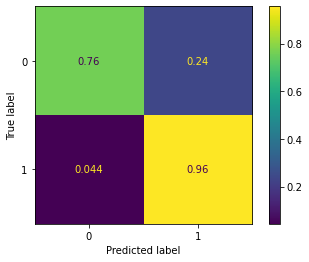

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cbc,fr_test,tr_test,normalize='true')
plt.show()

##### __HISTOGRAM BASED GRADIENT BOOSTING__

Histogram-based gradient boosting:
 - Is a technique for training faster decision trees used in the gradient boosting ensemble.

This estimator is much faster than GradientBoostingClassifier for big datasets (n_samples >= 10 000).

This estimator has native support for missing values:
 - During training, the tree grower learns at each split point whether samples with missing values should go to the left or right child, based on the potential gain.
 - When predicting, samples with missing values are assigned to the left or right child consequently.
 - If no missing values were encountered for a given feature during training, then samples with missing values are mapped to whichever child has the most samples.


In [60]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgbc = HistGradientBoostingClassifier()
hgbc.fit(fr_train,tr_train)

HistGradientBoostingClassifier()

In [61]:
hgbc_tr_pred = hgbc.predict(fr_test)

In [62]:
hgbc_acc = accuracy_score(tr_test,hgbc_tr_pred)
hgbc_f1 = f1_score(tr_test,hgbc_tr_pred)
print(f'F1 score: {hgbc_f1}')
print(f'Accuracy_score: {hgbc_acc}')

F1 score: 0.7972945275671245
Accuracy_score: 0.7672941176470588


/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


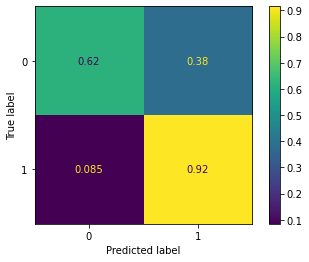

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(hgbc,fr_test,tr_test,normalize='true')
plt.show()

In [70]:
"""
#Hyperparameter tuning

from sklearn.model_selection import GridSearchCV
parameters_hgbc = [{'max_iter': [1000,1200,1500],
                'learning_rate': [0.1],
                'max_depth' : [25, 50, 75],
                'l2_regularization': [1.5],
                'scoring': ['f1_micro']}]
grid_search_hgbc = GridSearchCV(estimator = hgbc,
                           param_grid = parameters_hgbc,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search_hgbc.fit(fr_train, tr_train)
best_accuracy_hgb = grid_search_hgbc.best_score_
best_paramaeter_hgb = grid_search_hgbc.best_params_  
print("Best Accuracy of HGB: {:.2f} %".format(best_accuracy_hgb.mean()*100))
print("Best Parameter of HGB:", best_paramaeter_hgb) 

"""

Best Accuracy of HGB: 75.71 %
Best Parameter of HGB: {'l2_regularization': 1.5, 'learning_rate': 0.1, 'max_depth': 50, 'max_iter': 1000, 'scoring': 'f1_micro'}
